In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [18]:

org_crpped_dir = './dataset/IAM/cropped_data'
org_mask_dir = './dataset/IAM/masks'
pred_mask_dir = './dataset/IAM/mask_binary_pred'

org_img_path = org_mask_dir +'/l04-093.png'
pred_img_path = pred_mask_dir +'/l04-093.png'
cropped_img_path = org_crpped_dir +'/l04-093.png'

#canny on original image
image = cv2.imread(org_img_path)
(H, W) = image.shape[:2]
org_canny = cv2.Canny(image, 30, 150)

#canny on predicted image
pred_image = cv2.imread(pred_img_path)
(H, W) = image.shape[:2]
pred_canny = cv2.Canny(pred_image, 30, 150)

(-0.5, 799.5, 799.5, -0.5)

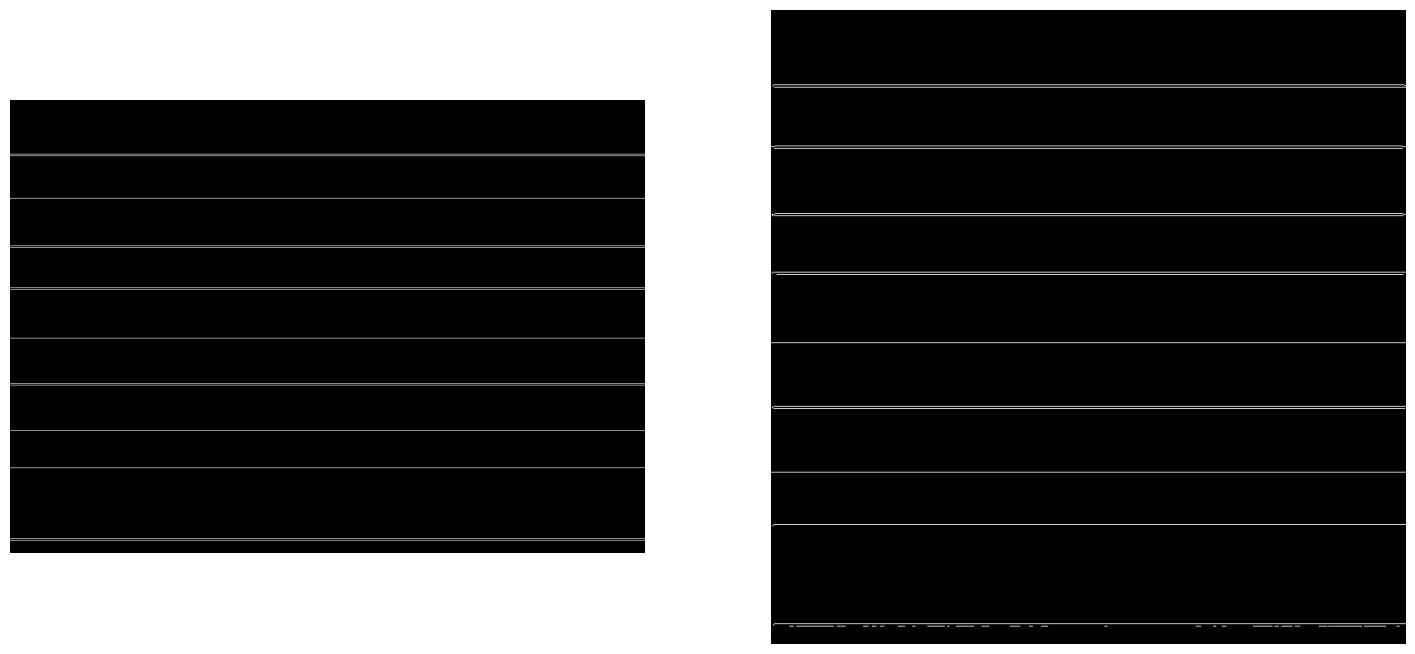

In [9]:

fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(org_canny,cmap='gray')
ax[1].imshow(pred_canny,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

In [30]:

org_img_path = org_mask_dir +'/j04-008.png'
pred_img_path = pred_mask_dir +'/j04-008.png'
cropped_img_path = org_crpped_dir +'/j04-008.png'

# Load images as greyscale but make main RGB so we can annotate in colour
seg  = cv2.imread(pred_img_path,cv2.IMREAD_GRAYSCALE)
seg = cv2.resize(seg, (800, 800))
main = cv2.imread(cropped_img_path,cv2.IMREAD_GRAYSCALE)
resized_main = cv2.resize(main, (800, 800))
main = cv2.cvtColor(resized_main,cv2.COLOR_GRAY2BGR)

# Dictionary giving RGB colour for label (segment label) - label 1 in red, label 2 in yellow
RGBforLabel = { 1:(0,0,255), 2:(0,255,255) }
print(pred_img_path)
print(cropped_img_path)
# Dictionary giving RGB colour for label (segment label) - label 1 in red, label 2 in yellow
RGBforLabel = { 1:(0,0,255), 2:(0,255,255) }


# Find external contours
contours,hierachy = cv2.findContours(seg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# Iterate over all contours
for i,c in enumerate(contours):
    # Find mean colour inside this contour by doing a masked mean
    mask = np.zeros(seg.shape, np.uint8)
    cv2.drawContours(mask,[c],-1,255, -1)
    # DEBUG: cv2.imwrite(f"mask-{i}.png",mask)
    mean,_,_,_ = cv2.mean(seg, mask=mask)
    # DEBUG: print(f"i: {i}, mean: {mean}")

    # Get appropriate colour for this label
    label = 2 if mean > 1.0 else 1
    colour = RGBforLabel.get(label)
    # DEBUG: print(f"Colour: {colour}")

    # Outline contour in that colour on main image, line thickness=1
    cv2.drawContours(main,[c],-1,colour,1)

# Save result
cv2.imwrite('overlay.png',main)

./dataset/IAM/mask_binary_pred/j04-008.png
./dataset/IAM/cropped_data/j04-008.png


True

(-0.5, 799.5, 799.5, -0.5)

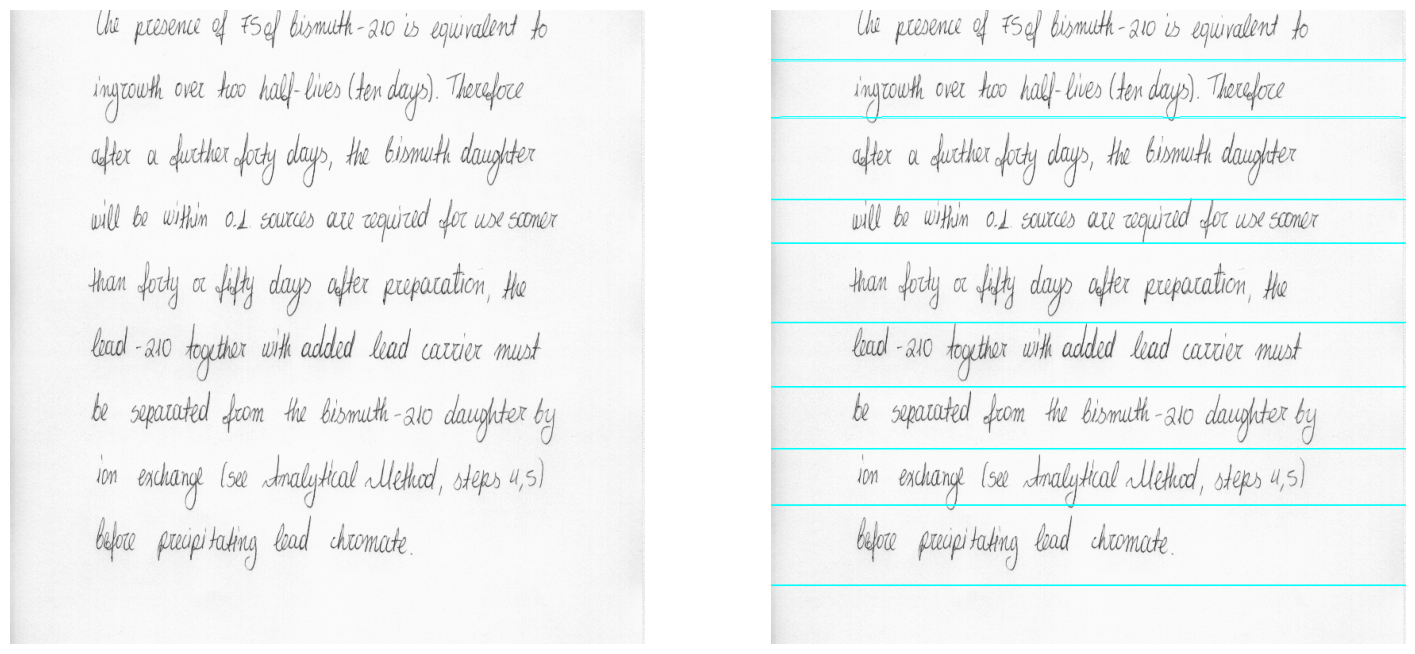

In [33]:
original_image = cv2.imread(cropped_img_path)
original_image = cv2.resize(original_image, (800, 800))
overlay_image = cv2.imread('overlay.png')
overlay_image = cv2.resize(overlay_image, (800, 800))
fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(original_image,cmap='gray')
ax[1].imshow(overlay_image,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

In [46]:


import imageio
from skimage.color import rgb2gray
from cv2 import imread
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.metrics import structural_similarity
from PIL.Image import Image
actual_img = 'dataset/IAM/cropped_data/j04-008.png'
pred_img = './dataset/IAM/output_lama/j04-008.png'

actual_img = imread(actual_img)[:,:,:3]
actual_img1 = rgb2gray(actual_img)
pred_img = imread(pred_img)
pred_img1 = rgb2gray(pred_img)

actual_img = np.array(Image.fromarray(actual_img1.astype(np.uint8)).resize((800, 800)))
pred_img = np.array(Image.fromarray(pred_img1.astype(np.uint8)).resize((800, 800)))

score, diff = structural_similarity(actual_img, actual_img, full=True)
print("Similarity Score: {:.3f}%".format(score * 100))


ValueError: the input array must have size 3 along `channel_axis`, got (514, 720, 4)